<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch9_8_pg_591_~_624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**08파이썬 추천시스템 패키지-Surprise**

추천시스템 구축을 위한 전용 패키지 Surprise

- 장점:

> 다양한 추천알고리즘, SVD,SVD++,NMF기반의 잠재요인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있다.

> 사이킷런 핵심 API와 유사한 API명을 가진다.

In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163479 sha256=e2e26f92b8bf09b6f2963052f3b2d390ced2a0211bbc6e406fe2813783a1a3a7
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

- Row 레벨 형태의 User-Item Rating데이터 로딩은 Dataset 클래스를 이용해서만 가능하다.
- 무비렌즈 사이트 제공하는 과거 버전 데이터 세트를 가져오는 API를 제공한다.
- split API를 사용해 학습 데이터 세트와 테스트 데이터세트로 분리한다.

In [3]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
# 알고리즘 객체 생성
algo=SVD()
algo.fit(trainset)

In [5]:
predictions = algo.test(testset)
print('prediction type:', type(predictions), 'size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type: <class 'list'> size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.585770602532469, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=4.013190654699203, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.8202778828326363, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.6840281465425413, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.5621712937425145, details={'was_impossible': False})]

SVD 알고리즘 객체의 test 메서드의 호출 결과는 파이썬 리스트

- Prediction 객체는 Surprise 패키지에서 제공하는 데이터 타입이며, uid, iid, r_ui 정보 기반 추천 예측 평점 데이터를 튜플형태로 가지고 있다.

In [6]:
# Prediction 객체에서 uid, iid, est 속성 추출
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.585770602532469),
 ('882', '291', 4.013190654699203),
 ('535', '507', 3.8202778828326363)]

In [7]:
# 사용자 아이디, 아이템 아이디는 문자여롤 입력해야 함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.23   {'was_impossible': False}


In [8]:
# RMSE 평가 결과 확인
accuracy.rmse(predictions)

RMSE: 0.9470


0.9470335063558105

이처럼 Surprise 패키지를 이용하면 쉽게 추천시스템을 구현할 수 있다.

**Surprise 모듈 소개**
- Surprise는  uid, iid, est 데이터가 로우 레벨로 된 데이터 세트만 적용가능.
(순서 반드시 고려)

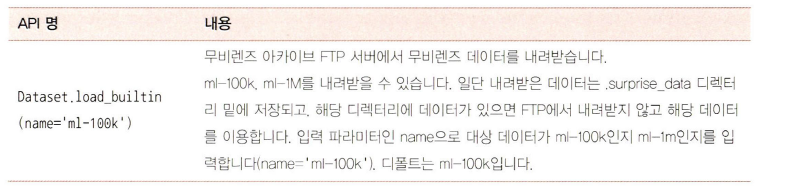

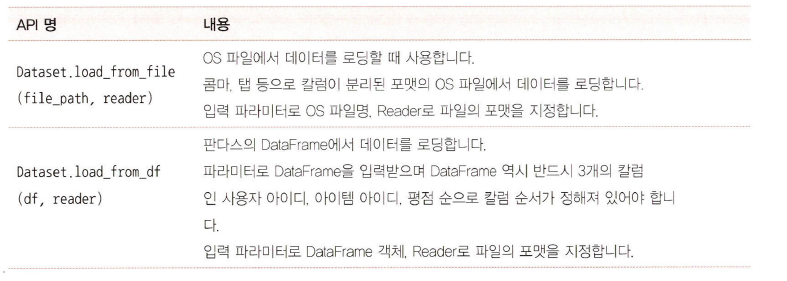

**OS파일 데이터를 Surprise 데이터 세트로 로딩**

In [25]:
import pandas as pd

ratings = pd.read_csv('/content/ratings.csv')
# 인덱스, 헤더 모두 제거
ratings.to_csv('ratings_noh.csv', index=False, header=False)


In [26]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data = Dataset.load_from_file('/content/ratings_noh.csv', reader=reader)

In [27]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**판다스 DataFrame에서 Surprise 데이터 세트로 로딩**

- SVD추천 예측 코드

In [29]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**Surprise 추천 알고리즘 클래스**
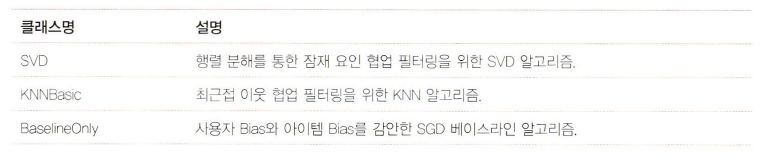

Surprise SVD 비용함수는 사용자 베이스라인 편향성을 감안한 평점예측에 Regualrization 을 적용한 것.

**베이스라인 평점**
아이템 평가에 편향성 요소를 반영해 평점을 부과하는 것

- 전체평균평점= 모든 사용자의 아이템에 대한 평점을 평균한 값
- 사용자 편향점수= 사용자별 아이템 평점 평균값-전체 평균 평점
- 아이템 편향점수= 아이템 평점평균값-전체 평균평점

**교차검증과 하이퍼 파라미터 튜닝**



In [30]:
from surprise.model_selection import cross_validate

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/content/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8725  0.8692  0.8774  0.8733  0.8823  0.8749  0.0045  
MAE (testset)     0.6706  0.6703  0.6722  0.6737  0.6776  0.6729  0.0026  
Fit time          1.73    2.52    2.07    1.66    1.73    1.94    0.32    
Test time         0.15    0.22    0.32    0.13    0.13    0.19    0.08    


{'test_rmse': array([0.8724864 , 0.86917892, 0.87738466, 0.8732942 , 0.88226449]),
 'test_mae': array([0.67064914, 0.67030417, 0.67223471, 0.67370902, 0.67760735]),
 'fit_time': (1.7307460308074951,
  2.5174758434295654,
  2.070582389831543,
  1.6584789752960205,
  1.7321457862854004),
 'test_time': (0.14576292037963867,
  0.22478580474853516,
  0.32308077812194824,
  0.1268777847290039,
  0.12553882598876953)}

In [31]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mae로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8781274019867912
{'n_epochs': 20, 'n_factors': 50}


**Surprise를 이용한 개인화 영화 추천 시스템 구축**

데이터 세트 전체를 학습 데이터로 사용하려면 DatasetAutoFolds 클래스를 이용한다.

In [33]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/content/ratings_noh.csv', reader=reader)

# 전체 데이터를 학습 데이터로 생성함
trainset = data_folds.build_full_trainset()

In [34]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [35]:
# 영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/movies.csv')

# userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds=ratings[ratings['userId']==9]['movieId']

if movieIds[movieIds==42].count()==0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


추천예상 평점은 predict()메서드를 이용하면 알 수 있다.

In [36]:
# predict() 메서드 이용 사용자 추천예상 평점 구하기
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [37]:
def get_unseen_surprise(ratings, movies, userId):
  # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
  seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

  # 모든 영화의 movieId를 리스트로 생성
  total_movies = movies['movieId'].tolist()

  # 모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies), '전체 영화 수:', len(total_movies))

  return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


In [38]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
  # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list로 저장
  predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]

  # predictions list 객체는 surprise의 predictions 객체를 원소로 갖고 있다.
  # [Prediction(uid='9', iid='1', est=3.69), Predictions(uid='9', iid='2', est=2.98),,,]

  # 이를 est 값으로 정렬하기 위해 아리애 sortkey_est 함수 정의
  # sortdey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행
  def sortkey_est(pred):
    return pred.est

  # sortkey_est() 반환값의 내림차순으로 정렬 수행하고 top_n개의 최상위 값 추출
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  # top_n 으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
  top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('### top-10 추천 영화 리스트 ###')
for top_movie in top_movie_preds:
  print(top_movie[1], ':', top_movie[2])

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
### top-10 추천 영화 리스트 ###
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
